# Data Load

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the training dataset
train_df = pd.read_csv('/kaggle/input/predictive-analytics-for-customer-churn-dataset/train.csv')

# Display the first few rows of the training data
print("Training Data Preview:")
print(train_df.head())

# Basic info about the dataset
print("\nTraining Data Info:")
train_df.info()

# Summary statistics for numerical columns
print("\nTraining Data Description:")
print(train_df.describe())

# Checking for missing values
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

# You may want to also look at the distribution of 'SupportTicketsPerMonth' to understand how to categorize it
print("\nDistribution of Support Tickets Per Month:")
print(train_df['SupportTicketsPerMonth'].value_counts())


Training Data Preview:
   AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          20       11.055215    221.104302          Premium   
1          57        5.175208    294.986882            Basic   
2          73       12.106657    883.785952            Basic   
3          32        7.263743    232.439774            Basic   
4          57       16.953078    966.325422          Premium   

      PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
0      Mailed check               No        Both                No   
1       Credit card              Yes      Movies                No   
2      Mailed check              Yes      Movies                No   
3  Electronic check               No    TV Shows                No   
4  Electronic check              Yes    TV Shows                No   

  DeviceRegistered  ViewingHoursPerWeek  ...  ContentDownloadsPerMonth  \
0           Mobile            36.758104  ...                        10   
1           Tablet     

# Generating Feedbacks

In [2]:
import pandas as pd
import numpy as np
import os
from tqdm.auto import tqdm

# Define sample feedbacks for each category with 10 entries each
low_feedbacks = [
    "I'm very pleased with the service, no issues at all! Everything runs smoothly and efficiently.",
    "Absolutely love how reliable everything is, I haven’t had a single problem!",
    "Truly outstanding service! It meets all my needs without any troubles.",
    "I'm extremely satisfied with the service, which has consistently exceeded my expectations.",
    "Really loving it so far, great job! I feel fully supported and stress-free.",
    "This service has been a game changer for me, keeping everything running perfectly.",
    "Couldn't ask for more, the service is top-notch and works like a charm!",
    "Every interaction I’ve had has been positive, I’m so glad I chose this service!",
    "Flawless performance and reliability, I recommend it to everyone!",
    "Excellent service that keeps me coming back, no reason to look elsewhere!"
]

medium_feedbacks = [
    "The service is generally good but there are occasional glitches that need addressing.",
    "Overall, it's decent but there are moments when I wish things went more smoothly.",
    "It works well most of the time, though I have run into a few annoying issues.",
    "Pretty good service but customer support could definitely be faster.",
    "I like the service but sometimes it doesn’t live up to my expectations.",
    "The service is okay, but I think it could use some improvements here and there.",
    "Fairly good, but it needs a bit more to reach its full potential.",
    "Not bad, but it doesn’t always work as well as I’d hope.",
    "Good when it works, but I’ve had to contact support more than I’d like.",
    "Satisfactory but not without its faults, which I hope will be resolved soon."
]

high_feedbacks = [
    "I am frequently frustrated by the service, it seems there’s always something going wrong.",
    "Definitely not satisfied, considering other options due to the ongoing issues.",
    "Too many problems, it's not worth the hassle. I expected much better.",
    "I'm unhappy with how often I've needed support, it’s not acceptable.",
    "Thinking of switching services due to my poor experiences so far.",
    "The service is unreliable and frustrating to use, which is very disappointing.",
    "I've had numerous issues and the resolution process is too slow.",
    "Disappointed with the frequent disruptions, not what I signed up for.",
    "Considering cancelling my subscription due to the lack of reliability.",
    "Unsatisfactory service that has failed to meet my needs repeatedly."
]

# Load your data
input_path = '/kaggle/input/predictive-analytics-for-customer-churn-dataset/train.csv'
train_df = pd.read_csv(input_path)

# Function to assign feedback based on the number of support tickets
def assign_feedback(tickets):
    if tickets <= 1:
        return np.random.choice(low_feedbacks)
    elif 2 <= tickets <= 5:
        return np.random.choice(medium_feedbacks)
    else:
        return np.random.choice(high_feedbacks)

# Apply the function to the dataframe
train_df['Feedback'] = train_df['SupportTicketsPerMonth'].apply(assign_feedback)

# Display some of the feedbacks to verify
print(train_df[['SupportTicketsPerMonth', 'Feedback']].head())

# Save the updated DataFrame to a new CSV file in the Kaggle working directory
output_path = '/kaggle/working/updated_train_with_feedback.csv'
train_df.to_csv(output_path, index=False)


   SupportTicketsPerMonth                                           Feedback
0                       4  Satisfactory but not without its faults, which...
1                       8  Considering cancelling my subscription due to ...
2                       6  Thinking of switching services due to my poor ...
3                       2  I like the service but sometimes it doesn’t li...
4                       4  The service is generally good but there are oc...


In [3]:
print(train_df.head(20))

    AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0           20       11.055215    221.104302          Premium   
1           57        5.175208    294.986882            Basic   
2           73       12.106657    883.785952            Basic   
3           32        7.263743    232.439774            Basic   
4           57       16.953078    966.325422          Premium   
5          113        7.295744    824.419081          Premium   
6           38       12.340675    468.945639          Premium   
7           25        7.247550    181.188753         Standard   
8           26       19.803233    514.884050         Standard   
9           14       18.842934    263.801080         Standard   
10         114       18.323630   2088.893783          Premium   
11           3       16.271635     48.814904         Standard   
12          64        7.749444    495.964395            Basic   
13          43        6.209336    267.001469          Premium   
14          98        7.5

In [4]:
print(list(train_df.columns))


['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating', 'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID', 'Churn', 'Feedback']


In [5]:
import pandas as pd

# Load the dataset into a DataFrame named 'df'
df = pd.read_csv('/kaggle/working/updated_train_with_feedback.csv')

# Display the first few rows of the DataFrame to get an overview of the data
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the DataFrame, including the data types and number of non-null values
print("\nDataframe Information:")
df.info()

# Summary statistics for numerical columns
print("\nSummary Statistics for numerical columns:")
print(df.describe())

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check the unique values and counts for categorical data to understand the distribution, excluding 'Feedback'
print("\nValue counts for categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Feedback':  
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())


First few rows of the dataset:
   AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          20       11.055215    221.104302          Premium   
1          57        5.175208    294.986882            Basic   
2          73       12.106657    883.785952            Basic   
3          32        7.263743    232.439774            Basic   
4          57       16.953078    966.325422          Premium   

      PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
0      Mailed check               No        Both                No   
1       Credit card              Yes      Movies                No   
2      Mailed check              Yes      Movies                No   
3  Electronic check               No    TV Shows                No   
4  Electronic check              Yes    TV Shows                No   

  DeviceRegistered  ViewingHoursPerWeek  ...  GenrePreference  UserRating  \
0           Mobile            36.758104  ...           Sci-Fi    2.176498   
1        

In [6]:
# Print the column names of the DataFrame
print(df.columns)


Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn', 'Feedback'],
      dtype='object')


# EDA

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


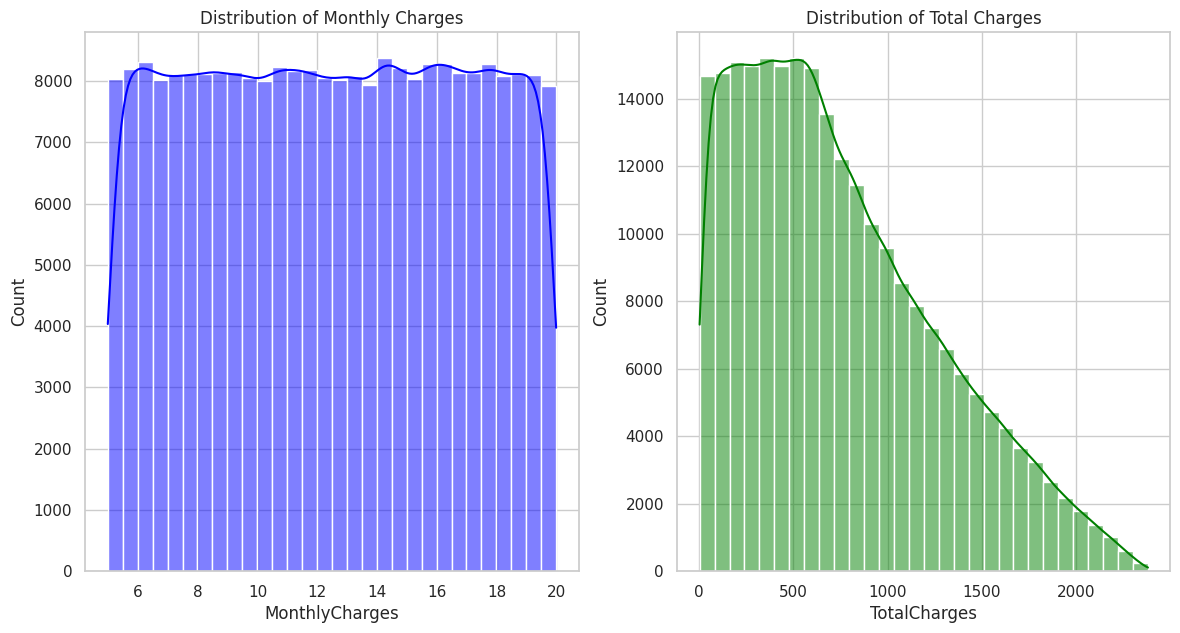

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Setting aesthetic parameters for our plots
sns.set(style="whitegrid")

# 1. Distribution of Monthly and Total Charges
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], bins=30, color='blue', kde=True)
plt.title('Distribution of Monthly Charges')

plt.subplot(1, 2, 2)
sns.histplot(df['TotalCharges'], bins=30, color='green', kde=True)
plt.title('Distribution of Total Charges')
plt.show()

In [8]:
# Creating a 3D scatter plot for Viewing Habits using a sample of 0.5% of the data for better clarity
df_sample = df.sample(frac=0.005, random_state=42)  # Sampling 0.5% of the data

# 3D Scatter Plot of Viewing Habits
fig = px.scatter_3d(df_sample, x='ViewingHoursPerWeek', y='AverageViewingDuration', z='ContentDownloadsPerMonth',
                    color='MonthlyCharges', color_continuous_scale=px.colors.cyclical.IceFire)
fig.update_layout(title='3D Scatter Plot of Customer Viewing Habits', margin=dict(l=0, r=0, b=0, t=30))
fig.show()


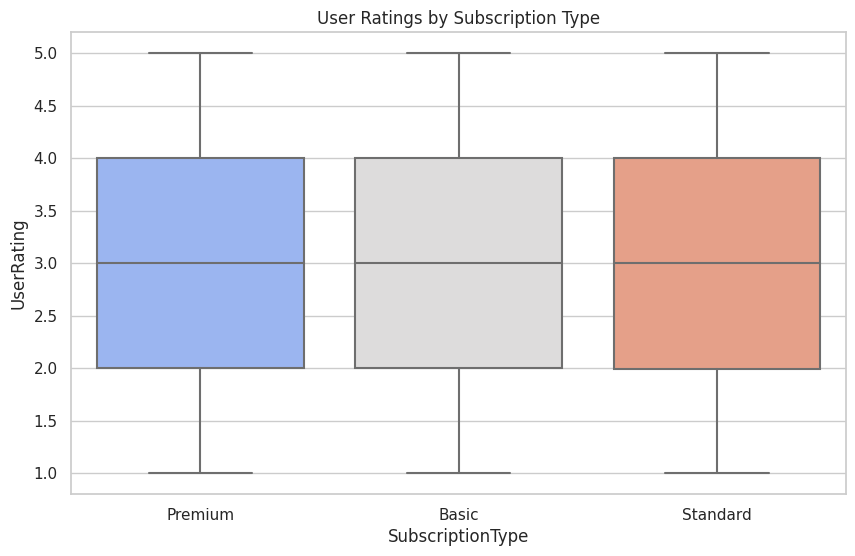

In [9]:
# 3. Box Plot of User Ratings by Subscription Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='SubscriptionType', y='UserRating', data=df, palette='coolwarm')
plt.title('User Ratings by Subscription Type')
plt.show()



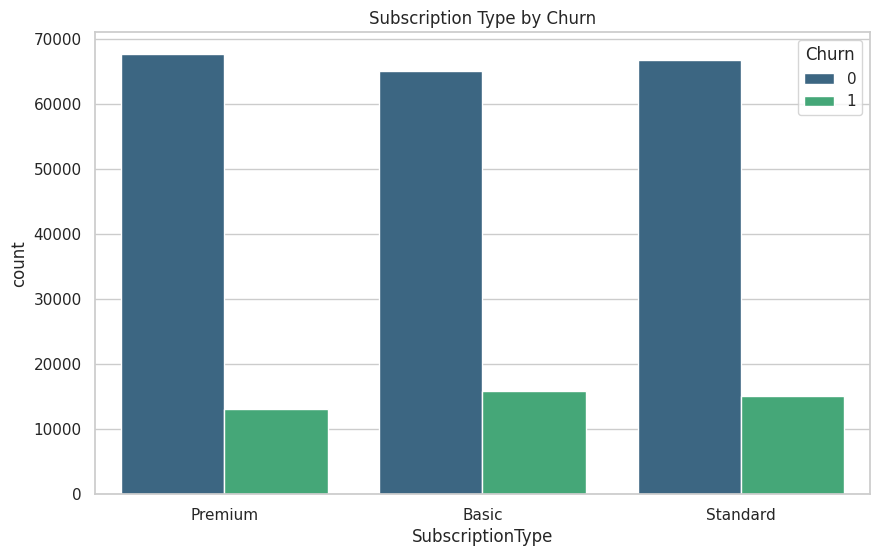

In [10]:
# 4. Count Plot of Subscription Type segmented by Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='SubscriptionType', hue='Churn', data=df, palette='viridis')
plt.title('Subscription Type by Churn')
plt.show()

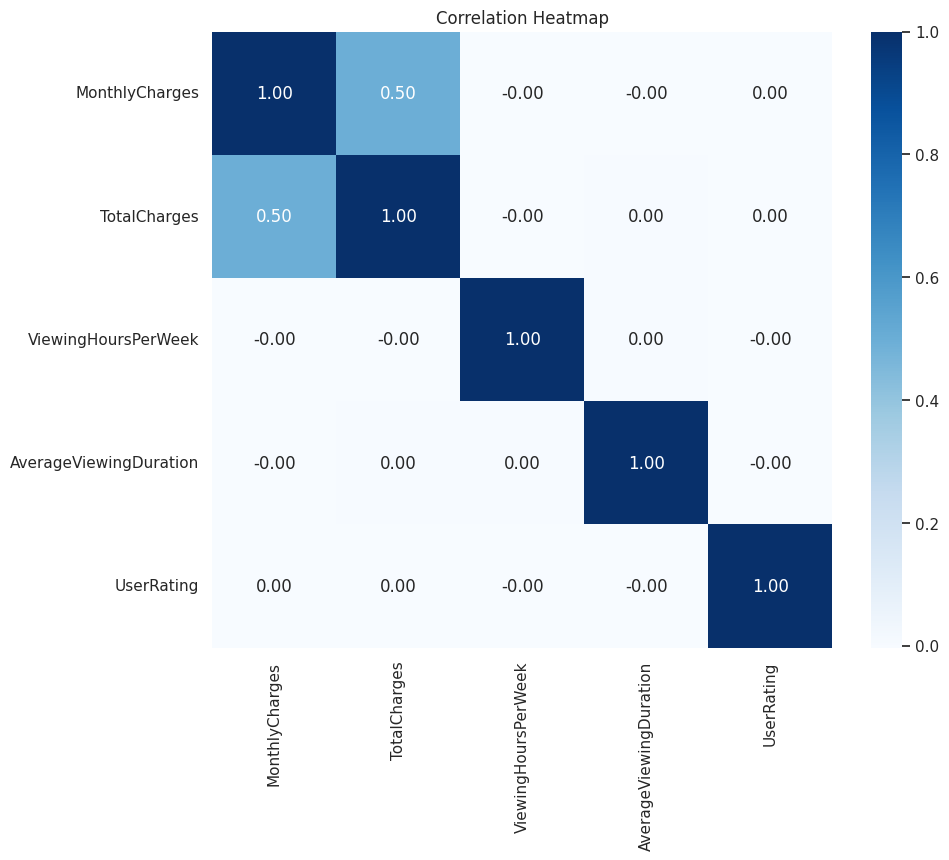

In [11]:
# Heatmap of numerical correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df[['MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'UserRating']].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


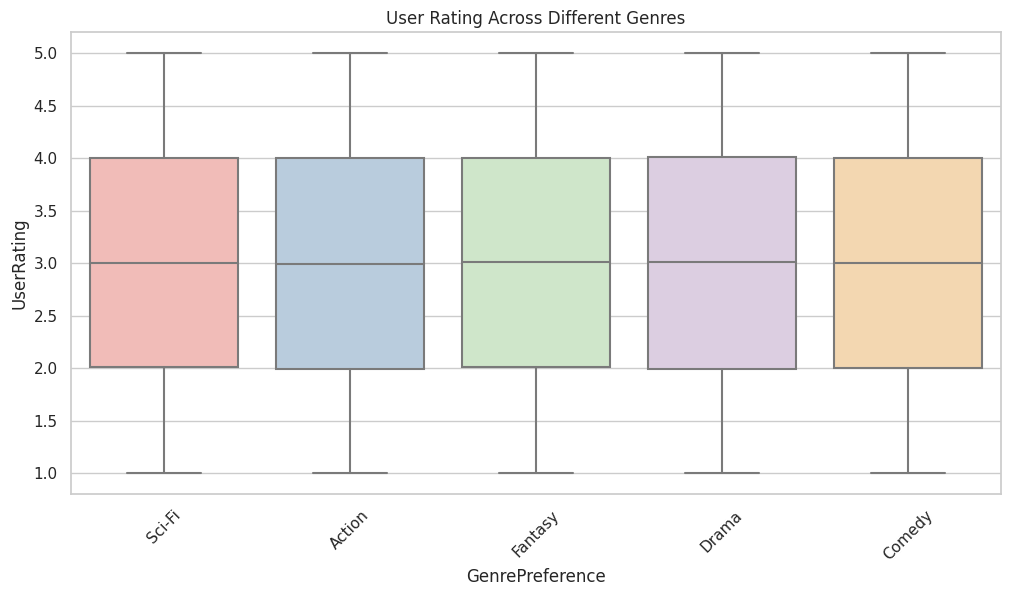

In [12]:
# Exploring user rating across different genres
plt.figure(figsize=(12, 6))
sns.boxplot(x='GenrePreference', y='UserRating', data=df, palette='Pastel1')
plt.title('User Rating Across Different Genres')
plt.xticks(rotation=45)
plt.show()

In [13]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is already loaded and contains the required data.
# Sampling 0.5% of the data for clarity in visualization
df_sample = df.sample(frac=0.0005, random_state=42)

# 3D Scatter Plot to explore Viewing Hours, Downloads, and User Ratings with distinct colors for each Gender
fig = px.scatter_3d(df_sample, x='ViewingHoursPerWeek', y='ContentDownloadsPerMonth', z='UserRating',
                    color='Gender', symbol='MultiDeviceAccess', opacity=0.7,
                    color_discrete_map={"Male": "blue", "Female": "magenta"},
                    title='3D Scatter: Viewing Hours vs Downloads vs User Rating')
fig.show()


In [14]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('/kaggle/working/updated_train_with_feedback.csv')

# Map Churn values to labels
df['Churn_Label'] = df['Churn'].map({0: 'Retained', 1: 'Churned'})

# Calculate counts for each label
churn_counts = df['Churn_Label'].value_counts().reset_index()
churn_counts.columns = ['Churn Status', 'Count']

# Define pastel colors for the charts
pastel_colors = ['#FDB9C8', '#B6E2D3']

# Bar Chart to show the distribution of the 'Churn' label
bar_fig = px.bar(churn_counts, x='Churn Status', y='Count',
                 title='Bar Chart of Customer Churn',
                 color='Churn Status',
                 color_discrete_sequence=pastel_colors)
bar_fig.show()


In [15]:
# Map Churn values to labels
df['Churn_Label'] = df['Churn'].map({0: 'Retained', 1: 'Churned'})

# Define pastel colors for the charts
pastel_colors = ['#FDB9C8', '#B6E2D3']

# Pie Chart to show the distribution of the 'Churn' label
pie_fig = px.pie(df, names='Churn_Label', title='Distribution of Customer Churn', color_discrete_sequence=pastel_colors)
pie_fig.show()

In [16]:
# Calculate the counts of each class in the 'Churn' column
churn_distribution = df['Churn'].value_counts()

# Calculate the percentage of each class
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

# Print the results
print("Class Distribution for 'Churn':")
print(churn_distribution)
print("\nClass Distribution Percentage for 'Churn':")
print(churn_percentage)

Class Distribution for 'Churn':
Churn
0    199605
1     44182
Name: count, dtype: int64

Class Distribution Percentage for 'Churn':
Churn
0    81.876802
1    18.123198
Name: proportion, dtype: float64


In [17]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/kaggle/working/updated_train_with_feedback.csv')

# Ensure data types are correct for calculations
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['ViewingHoursPerWeek'] = pd.to_numeric(df['ViewingHoursPerWeek'], errors='coerce')
df['AccountAge'] = pd.to_numeric(df['AccountAge'], errors='coerce')

# Fill any potential NaN values that might affect calculations
df.fillna({
    'MonthlyCharges': df['MonthlyCharges'].median(),
    'TotalCharges': df['TotalCharges'].median(),
    'ViewingHoursPerWeek': df['ViewingHoursPerWeek'].median(),
    'AccountAge': df['AccountAge'].median(),
}, inplace=True)

# Calculate TotalUsage as ViewingHoursPerWeek multiplied by AccountAge
df['TotalUsage'] = df['ViewingHoursPerWeek'] * df['AccountAge']

# Calculate CostPerHour by dividing TotalCharges by TotalUsage
# Avoid division by zero by adding a small number to the denominator
df['CostPerHour'] = df['TotalCharges'] / (df['TotalUsage'] + 0.01)
df['CostPerHour'].replace([np.inf, -np.inf], 0, inplace=True)

# Verify and print out the dataframe structure and sample data
print("Dataframe information after preprocessing:")
df.info()

print("\nFirst few rows after preprocessing:")
print(df[['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'TotalUsage', 'CostPerHour']].head())


Dataframe information after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  U

<ipython-input-17-94002252c4ab>:27: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





# Usage Patterns

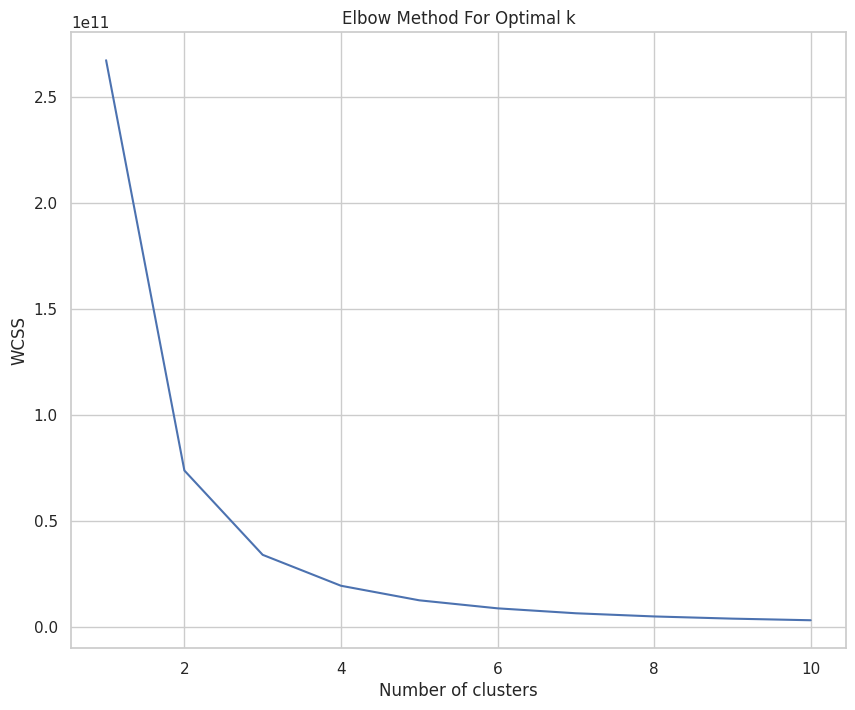

Clustering applied:
    TotalUsage  CostPerHour  Cluster
0   735.162078     0.300752        2
1  1849.682366     0.159479        1
2   539.846688     1.637075        2
3   894.732438     0.259784        0
4  1144.753650     0.844127        0
5  2449.646789     0.336545        1
6  1387.484913     0.337980        0
7   408.895408     0.443107        2
8   213.276156     2.414053        2
9   539.849719     0.488647        2


In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare data for clustering
features_for_clustering = ['TotalUsage', 'CostPerHour']
X = df[features_for_clustering].dropna()  # Ensure no NaN values

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):  # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'elbow'
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Assuming the elbow point is observed at k=4 (example)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Print some output to verify
print("Clustering applied:")
print(df[['TotalUsage', 'CostPerHour', 'Cluster']].head(10))



# Engagement Levels

In [19]:
import pandas as pd
import numpy as np

# Assuming df is already loaded and preprocessed
# Convert MultiDeviceAccess to a numeric factor where 'Yes' = 1, 'No' = 0
df['MultiDeviceAccess'] = df['MultiDeviceAccess'].map({'Yes': 1, 'No': 0})

# Calculate the EngagementScore
df['EngagementScore'] = (
    0.4 * df['ViewingHoursPerWeek'] +
    0.2 * df['WatchlistSize'] +
    0.3 * df['UserRating'] +
    0.1 * df['MultiDeviceAccess']
)

# Update the dataframe name for clarity
df_engagement = df

# Print out the updated dataframe info and first few rows to verify
print(df_engagement.info())
print("\nFirst few rows after adding engagement scores:")
print(df_engagement[['ViewingHoursPerWeek', 'WatchlistSize', 'UserRating', 'MultiDeviceAccess', 'EngagementScore']].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  int64  
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [20]:
print(df_engagement.head())

   AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          20       11.055215    221.104302          Premium   
1          57        5.175208    294.986882            Basic   
2          73       12.106657    883.785952            Basic   
3          32        7.263743    232.439774            Basic   
4          57       16.953078    966.325422          Premium   

      PaymentMethod PaperlessBilling ContentType  MultiDeviceAccess  \
0      Mailed check               No        Both                  0   
1       Credit card              Yes      Movies                  0   
2      Mailed check              Yes      Movies                  0   
3  Electronic check               No    TV Shows                  0   
4  Electronic check              Yes    TV Shows                  0   

  DeviceRegistered  ViewingHoursPerWeek  ...  WatchlistSize  ParentalControl  \
0           Mobile            36.758104  ...              3               No   
1           Tablet          

# Sentiment Analysis

In [21]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, pipeline
from tqdm.auto import tqdm
import pandas as pd

# Assuming df_engagement is already loaded and contains the data

# Initialize tokenizer and model for DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased-finetuned-sst-2-english',  # A fine-tuned version for sentiment analysis
    num_labels=2
)

# Create a sentiment classifier pipeline
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Define a function to extract sentiment and score
def get_sentiment_details(text):
    results = nlp(text)
    label = results[0]['label'].replace("LABEL_0", "Negative").replace("LABEL_1", "Positive")
    score = results[0]['score']
    return label, score

# Apply the model to the 'Feedback' column for sentiment analysis with a progress bar
tqdm.pandas()  # Enable progress_apply with tqdm
df_engagement['SentimentDetails'] = df_engagement['Feedback'].progress_apply(get_sentiment_details)

# Extract Sentiment and SentimentScore into separate columns
df_engagement[['Sentiment', 'SentimentScore']] = pd.DataFrame(df_engagement['SentimentDetails'].tolist(), index=df_engagement.index)

# Rename the dataframe to df_bert for clarity and further usage
df_bert = df_engagement

# Print out some results to verify
print(df_bert[['Feedback', 'Sentiment', 'SentimentScore']].head())


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Device set to use cuda:0


  0%|          | 0/243787 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


                                            Feedback Sentiment  SentimentScore
0  Satisfactory but not without its faults, which...  POSITIVE        0.986309
1  Considering cancelling my subscription due to ...  NEGATIVE        0.999771
2  Thinking of switching services due to my poor ...  NEGATIVE        0.999266
3  I like the service but sometimes it doesn’t li...  NEGATIVE        0.999575
4  The service is generally good but there are oc...  POSITIVE        0.668087


In [22]:
print(df_bert.head(50))

    AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0           20       11.055215    221.104302          Premium   
1           57        5.175208    294.986882            Basic   
2           73       12.106657    883.785952            Basic   
3           32        7.263743    232.439774            Basic   
4           57       16.953078    966.325422          Premium   
5          113        7.295744    824.419081          Premium   
6           38       12.340675    468.945639          Premium   
7           25        7.247550    181.188753         Standard   
8           26       19.803233    514.884050         Standard   
9           14       18.842934    263.801080         Standard   
10         114       18.323630   2088.893783          Premium   
11           3       16.271635     48.814904         Standard   
12          64        7.749444    495.964395            Basic   
13          43        6.209336    267.001469          Premium   
14          98        7.5

In [23]:
# Assuming 'df_bert' is loaded and contains a 'Sentiment' column
# Check the unique values and distribution in the 'Sentiment' column
unique_sentiments = df_bert['Sentiment'].unique()
distribution = df_bert['Sentiment'].value_counts()

unique_sentiments, distribution



(array(['POSITIVE', 'NEGATIVE'], dtype=object),
 Sentiment
 NEGATIVE    146620
 POSITIVE     97167
 Name: count, dtype: int64)

In [24]:
# Save the updated DataFrame to a CSV file in the Kaggle working directory
df_bert.to_csv('/kaggle/working/best_updated_file.csv', index=False)

print("Dataframe has been saved successfully to 'best_updated_file.csv' in the Kaggle working directory.")


Dataframe has been saved successfully to 'best_updated_file.csv' in the Kaggle working directory.
